<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>


### Stabilized Representations in Lower Dimensional Space


#### Midé Mabadeje$^{1}$ (PhD Candidate) & Michael Pyrcz$^{1,2}$ (Associate Professor), University of Texas at Austin

 1. Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

 2. Department of Geological Sciences, Jackson School of Geosciences

### Stabilized Representations in Lower Dimensional Space

Here's a demonstration on how to find the optimal rotation, reflection, and translation for corresponding points in a low dimensional space to help stabilize the projections such that the solutions obtained are invariant when using multidimensional scaling (MDS) as a dimensionality reduction method and other Manifold DR methods.


#### Multidimensional Scaling

A powerful ordination method in inferential statistics / information visualization for exploring / visualizing the similarity (conversely the difference) between individual samples from a high dimensional dataset.

* beyond 2 or 3 features it is difficult to visualize the relationship between samples

* for 2 features we can easily visualize the relationships between samples with a scatter plot

* for 3 features we can either visualize in 3D or include color or matrix scatter plots

Multidimensional scaling projects the $m$ dimensional data to $p$ dimensions such that $p << m$.

* ideally we are able to project to $p=2$ to easily explore the relationships between the samples

While principal component analysis (PCA) operates with the covariance matrix, multidimensional scaling operates with the distance / dissimilarity matrix.

* you don't need to know the actual feature values, just the distance or dissimilarity between the samples

* as with any distance in feature space, we consider feature standardization and weighting

* we may also work with a variety of dissimilarity measures


#### Metric Multidimensional Scaling

A generalization of classical multidimensional scaling with a variety of metrics and a loss function optimization.

* formulated as an optimization problem to minimize the square difference between the original and projected pairwise distances

\begin{equation}
min_{x_1,\ldots,x_m} \sum_{i<j} \left( ||x_i - x_j|| - \delta_{i,j} \right)^2
\end{equation}

where $||x_i - x_j||$ are the pairwise distances in the projected space ($p$ dimensional) and $\delta_{i,j}$ are the pairwise distances in the original feature space.


General comments about metric multidimensional scaling:

* nonlinear dimensionality reduction

* no distribution assumption

* dissimilarity measure must be meaningful

* dimensionality reduction is performed such that the error in the sample pairwise distance is minimized

* there is a variant known as Non-metric Multidimensional Scaling for ordinal features (categorical with ordering).

#### Checking Multidimensional Scaling Results

The multidimensional scaling approach minimizes the square difference of the pairwise distances between all the data samples and each other between the projected, lower dimensional, and original feature space.

* **stress** is defined as:

\begin{equation}
Stress_P(x_1,\ldots,x_n) = \left( \sum_{i \ne j = 1,\ldots,n} \left( ||x_i - x_j|| - \delta_{i,j} \right)^2 \right)^{\frac{1}{2}}
\end{equation}


However, the above is the raw stress value, which is not very informative as high values does not necessarily indicate bad fit. A better way of communicating reliability is to calculate a normed stress, e.g. with Stress-1 implemented according to Kruskal (1964) on p. 3 where 0 indicates a perfect fit, 0.025 excellent, 0.05 good, 0.1 fair, and 0.2 poor. For more information see Kruskal (1964) p. 8–9 and Borg (2005) p.41–43


\begin{equation}
Stress_{norm} (x_1,\ldots,x_n) = \left( \dfrac { \sum_{i \ne j = 1,\ldots,n} \left( ||x_i - x_j|| - \delta_{i,j} )^2 \right } \left\sum_{i \ne j = 1,\ldots,n}\left( \delta_{i,j}^2 \right)\right \right)^{\frac{1}{2}}
\end{equation}

where $||x_i - x_j||$ are the pairwise distances in the projected space ($p$ dimensional) and $\delta_{i,j}$ are the pairwise distances in the original feature space.


* it is also useful to visualize the scatter plot of projected vs. original pairwise distances

## Rigid Transformations

A rigid transformation also known as isometry or Euclidean transformation is a transformation of the plane that preserves length. Reflections, translations, rotations, and combinations of these three transformations are "rigid transformations".

1. A translation is a transformation which "slides" a figure a fixed distance in a given direction without changing its size or shape, and without turning and flipping it.

2. A rotation is a transformation that turns a figure about a fixed point called the center of rotation. An object and its rotation are the same shape and size, but the figures may be turned in different directions. Rotations may be clockwise or counterclockwise.

3. A reflection can be thought of as folding or "flipping" an object over the line of reflection A point reflection exists when a figure is built around a single point called the center of the figure, or point of reflection.  For every point in the figure, there is another point found directly opposite it on the other side of the center such that the point of reflection becomes the midpoint of the segment joining the point with its image.  Under a point reflection, figures do not change size or shape.

However, in the case of MDS projections from high dimensional datasets to low dimensions these transformations are common place individually or combinatorially.

## Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/).
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal.
3. In the terminal type: pip install geostatspy.
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality.

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV_v4.csv at https://git.io/fhHLT.

There are examples below with GeostatsPy functions. You can go here to see a list of the available functions, https://git.io/fh4eX, and for other example workflows and source code.

### Import Library

In [1]:
import numpy as np                        # ndarray for gridded data
import pandas as pd                       # DataFrames for tabular data
# import joypy
import os                                 # set working directory, run executables
import seaborn as sns                     # for matrix scatter plots
import RigidTransformation_UQI as RT      # imports script consisting of functions to run workflow
import transformations as cg
import warnings
warnings.filterwarnings('ignore')

/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Function/transformations.py:1696: UserWarning: No module named '_transformations'
  warnings.warn(str(exc))


In [2]:
get_ipython()

### Set the working directory

I always like to do this so, I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [3]:
%pwd

'/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Fall 2022/Notebooks'

In [4]:
os.chdir('/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Fall 2022/Data')                     # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.

In [5]:
df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv')
df['TOC'] = np.where(df['TOC']<0.0, 0.0, df['TOC']) # set TOC < 0.0 as 0.0, otherwise leave the same
df.head()                             # we could also use this command for a table preview

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624


This dataset has features from 200 unconventional wells including: 

0. well index
1. well average porosity (%)
2. permeability (mD)
3. accoustic impedance (kg/m2s*10^6)
4. brittness ratio (%) 
5. total organic carbon (%) 
6. vitrinite reflectance (%)
8. normalized initial production 90 day average (MCFPD). 

Note, the dataset is synthetic, but has realistic ranges and general multivariate relationships.

Ranking features is really an effort to understand the features and their relationships with eachother.  We will start with basic data visualization and move to more complicated methods such are partial correlation and recursive feature elimination.

<br>

#### Summary Statistics

Let's check the summary statistics of our data.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.991950,0.478264,0.000000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,3864.407081,1553.277558,839.822063,2686.227611,3604.303506,4752.637555,8590.384044


Summary statistics are a critical first step in data checking. 

* this includes the number of valid (non-null) values for each feature (count removes all np.NaN from the totals for each variable).

* we can see the general behaviours such as central tendency, mean, and dispersion, variance.

* we can identify issue with negative values, extreme values, and values that are outside the range of plausible values for each property. 

* We can also establish the feature ranges for plotting.  We could calculate the feature range directly from the data with code like this:

```p
Pormin = np.min(df['Por'].values)          # extract ndarray of data table column
Pormax = np.max(df['Por'].values)          # and calculate min and max
```

but, this would not result in easy to understand color bars and axis scales, let's pick convenient round numbers. We will also declare feature labels for ease of plotting. 

In [7]:
pormin = 6.0; pormax = 24.0; porname = 'Porosity (%)'; portitle = 'Porosity' # user specified min and max values, and labels for plotting
permmin = 0.0; permmax = 10; permname = 'Permeability (mD)'; permtitle = 'Permeability'                
AImin = 1.0; AImax = 5.0; AIname = 'Acoustic Impedance (kg/m2s*10^6)'; AItitle = 'Acoustic Impedance'
brmin = 10.0; brmax = 85.0; brname = 'Brittleness Ratio (%)'; brtitle = 'Brittleness'
TOCmin = 0.0; TOCmax = 2.2; TOCname = 'Total Organic Carbon (%)'; TOCtitle = 'Total Organic Carbon' 
VRmin = 0.9; VRmax = 2.9; VRname = 'Vitrinite Reflectance (%)'; VRtitle = 'Vitrinite Reflectance'
prodmin = 500.0; prodmax = 9000.0; prodname = 'Normalized Initial Production (MCFPD)'; prodtitle = 'Normalized Initial Production'

Since the data looks to be in pretty good shape from its summary statistics and for brevity we skip outlier detection since synthetic i.e., a toy dataset. Let's look at the distributions with a martix scatter plot.

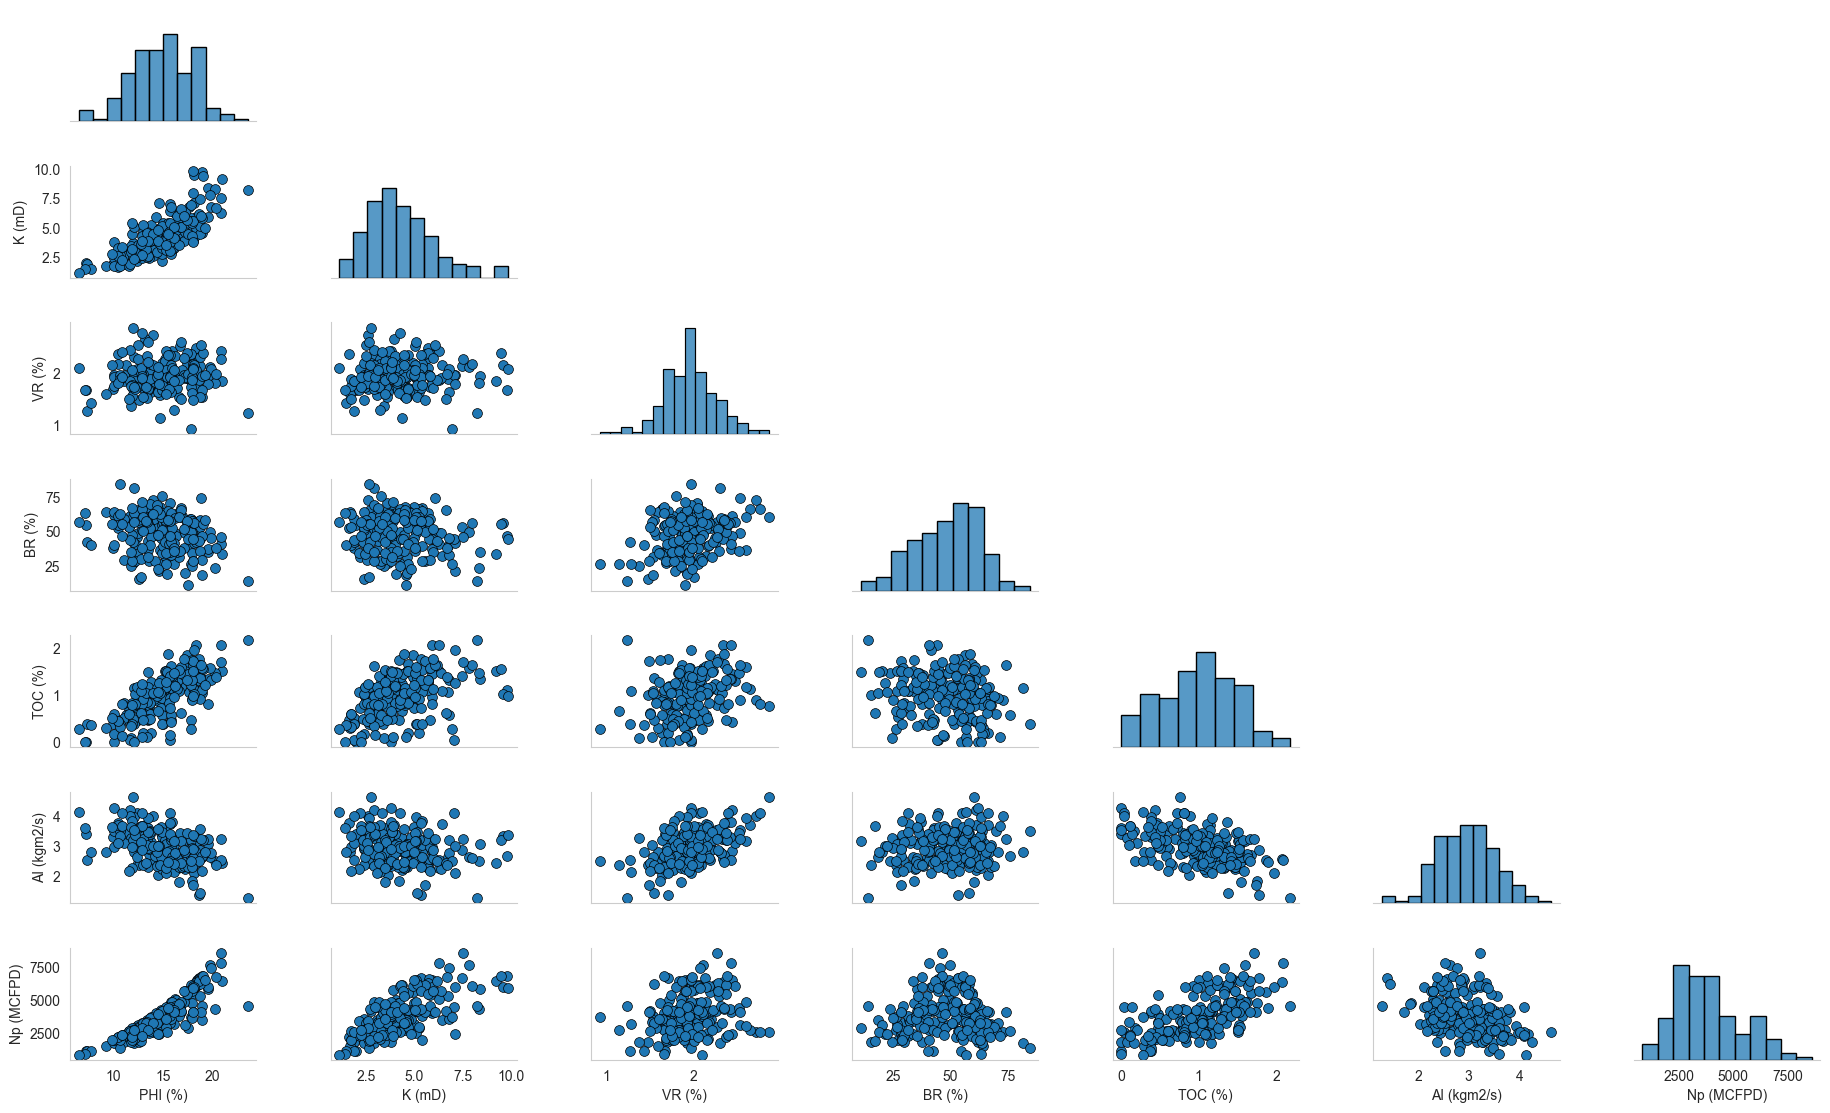

In [8]:
df = df.copy(deep=True)
df.rename(columns={'Por': 'PHI (%)','Perm': 'K (mD)', 'VR': 'VR (%)', 'Brittle': 'BR (%)',
                       'TOC': 'TOC (%)','AI': 'AI (kgm2/s)', 'Prod': 'Np (MCFPD)'}, inplace=True)

RT.matrix_scatter(df, ['PHI (%)', 'K (mD)', 'VR (%)', 'BR (%)', 'TOC (%)', 'AI (kgm2/s)',
                'Np (MCFPD)'], 0., 0., 1., 0.6, 0.4, 0.4, 'Scatterplot of all features for entire data', 1, hue_=None, n_case=True, save=True)

In [13]:
## save data frame, it is neded for reruns input
df.to_csv('/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Fall 2022/Data/to_use.csv', index=False)

In [ ]:
response = 'Np label'
num_response = 'Np (MCFPD)'

# Add category for response variable i.e., production levels for complete dataset
df = RT.make_levels(data=df, cat_response=response, num_response=num_response)
RT.matrix_scatter(df, ['PHI (%)', 'K (mD)',  'VR (%)', 'BR (%)', 'TOC (%)', 'AI (kgm2/s)',
                'Np (MCFPD)'], 0., 0., 1., 0.6, 0.4, 0.4, 'Scatterplot of all features coded by production levels for entire dataset', 1, hue_='Np label', n_case=True, save=True)

In [ ]:
# Curate parameters and variables for the proposed workflow i.e., N case
# N = 30
df_subset = df.iloc[:N,1:-1]

# Curate variables for N+1 case by adding a new sample i.e., row to existing dataframe within 95% CI from the dataframe in the N case
# sample_added = RT.make_sample_within_ci(df_subset.copy())
# df_subset2 = df_subset.copy().append(sample_added, ignore_index=True)

df_subset2 = RT.make_sample_within_ci(df_subset.copy())

# Insert well column index back into data frame for N+1 case
df_subset2.insert(0, 'Well', np.arange(1, len(df_subset2)+1))

# Insert well column index back into data frame for N case
df_subset.insert(0, 'Well', np.arange(1, len(df_subset)+1))

# Select predictor features of interest for proposed workflow
features = ['PHI (%)', 'AI (kgm2/s)', 'TOC (%)']

#### Data Preparation

Let's make an ordinal feature from the continuous production:

1. low
2. medium
3. high
4. very high

production rates.  This will help us visualize the results as we proceed, we can look at wells with different levels of production projected into a variety of lower dimensional spaces with multidimensional scaling.

<br>

Let's start with the N-samples case

In [ ]:
# Dataset for use in N case inclusive of category for response variable i.e., production levels
df_subset = RT.make_levels(data=df_subset, cat_response=response, num_response=num_response)
df_subset.head()

Take a look at the matrix scatter plot of our 3 features and the production levels for N case samples

In [ ]:
# Visualize the N-case dataset

other_df = RT.standardizer(df_subset, features, keep_only_std_features=False)

# Visualize the matrix scatter plot of the 3 standardized features and the response i.e., production levels.
RT.matrix_scatter(other_df, ['NS_PHI (%)', 'NS_AI (kgm2/s)', 'NS_TOC (%)'], 0.0, 0.0, 1.5, 1.5, 0.3, 0.2,
                  'Scatterplot of standardized features colored by production levels for N case samples', 1, hue_=response, n_case=True)

Similarly, do the same for the N+1 samples case

In [ ]:
# Dataset for use in N+1 case inclusive of category for response variable i.e., production levels
df_subset2 = RT.make_levels(data=df_subset2, cat_response=response, num_response=num_response)
df_subset2.tail()

Let's take a look at the matrix scatter plot of our 3 features and the production levels for N+1 case samples

In [ ]:
# Visualize the N+1 case dataset

other_df = RT.standardizer(df_subset2, features, keep_only_std_features=False)

# Visualize the matrix scatter plot of the 3 standardized features and the response i.e., production levels.
#RT.
RT.matrix_scatter(other_df, ['NS_PHI (%)', 'NS_AI (kgm2/s)', 'NS_TOC (%)'], 0.0, 0.0, 1.5, 1.5, 0.3, 0.2,
                  'Scatterplot of standardized features colored by production levels for N+1 case samples', 1, hue_=response, n_case=False, save=True)

# Proposed Workflow

#### Multidimensional Scaling

The multidimensional scaling method follows the sample pattern as other scikit-learn methods, we instantiate, fit and then apply or transform.

Let's run multidimensional scaling on our subset of features ($m = 3$) and project to only 2 features ($p = 2$).

* we set the random_state for repeatability, everyone gets the same result from the iterative solution

* we use 20 random initializations, the best solution is selected to improve likelihood of selection of (or search resulting in) the global optimum and not a local optimum

* we use an increased number of max_iter to improve the convergence

# Section 1: N-case samples


To make the above problem more trackable and due to computational power consumption, we highlight the use of the proposed workflow.

First, we take a subset of the entire dataset, e.g., 30 samples from the original dataset, then instantiate the class. Do note that standardization is performed on the features under the hood, this is imperative as our model works with dissimilarity-based distance metric.

In [ ]:
# Curate parameters and variables
num_realizations = 100
base_seed = 42
start_seed = 1
stop_seed = 10000
idx = 'Well'
dissimilarity_metric='euclidean'

# Instantiate the class
obj = RT.RigidTransformation(df=df_subset, features=features, idx=idx, num_realizations=num_realizations, base_seed=base_seed, start_seed=start_seed, stop_seed=stop_seed, dissimilarity_metric=dissimilarity_metric)

# Run rigid MDS
random_seeds, all_real, calc_real, all_rmse, norm_stress = obj.run_rigid_MDS()

Let's visualize the base case and three realizations using the same data

In [ ]:
response='Np label'
r_list=[0, 10, 40, 80]
Ax='MDS 1'
Ay='MDS 2'
title=['Base case realization ', 'Realization ', 'Realization ', 'Realization ']
x_off=0.02
y_off=0.07

#Set color map criteria
dpalette = sns.color_palette("rocket_r",n_colors = len(df[response].unique())+1)
cmap=dpalette

obj.real_plotter(response=response, r_idx=r_list, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, array2=None, save=True)

Prior to stabilization of data points, let's visualize all realizations on the same plot to show that MDS is not rotation invariant.

In [ ]:
obj.bivariate_plotter(palette_=1, response=response, x_off=x_off, y_off=y_off, title='Rotational variation in MDS for all realizations',
                     plot_type='variation', Ax=Ax, Ay=Ay, annotate=False, save=True)

Now, we visualize the base case, previously chosen realizations and the stabilized solution.

In [ ]:
obj.real_plotter(response=response, r_idx=r_list, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, array2=calc_real, save=True)

Visualize the 2D registration jitters in the calculated stabilized solution

In [ ]:
obj.bivariate_plotter(palette_=1, response=response, x_off=x_off, y_off=y_off, title='2-D registration distortion in N-case stabilized solutions',
                         plot_type='jitters', Ax=Ax, Ay=Ay, annotate=False, save=True)

In [ ]:
obj.bivariate_plotter(palette_=1, response=response, x_off=x_off, y_off=y_off, title='2-D registration distortion uncertainty in N-case stabilized solutions',
                         plot_type='uncertainty', Ax=Ax, Ay=Ay, save=True)

Based on the scenarios above, we see that regardless of the seed or random state used when computing the MDS projections, similar stabilized solutions are obtained with distortions/jitters. Next, we average out the stabilized solutions obtained to get a more accurate location for the projections in the MDS space by obtaining the expectation of the ith sample over enough realizations as the ground truth projection coordinates.


Note that using the expectation of the stabilized solution helps removed effects from slight random offsets, perturbations, or distortions if any within the n-sample demonstration.

In [ ]:
# Set base case index of choice
bc_idx =0


E = obj.expectation(r_idx=bc_idx, Ax=Ax, Ay=Ay, verbose=True)

Visualize the expectation of the stabilized MDS projections over multiple realizations compared to the base case.

In [ ]:
xmin = -5
xmax = 5
ymin = 0.0
ymax = 0.45

obj.expect_plotter(r_idx=bc_idx, Lx=Ax, Ly=Ay, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, save=True)

Visualize base case with expectation of the stabilized solution over all realizations for comparison.

In [ ]:
obj.compare_plot(response=response, r_idx=bc_idx, Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off, cmap=dpalette, save=True)

Let's check our model:

* we will calculate the original and projected pairwise distances between all the samples

* we will cross plot the original vs the projects pairwise distances

* we will plot the distribution of the ratio between projects / original pariwise distances

Now, let's calculate the distortion between original and projected pairwise distances between all samples. NEED TO UNDERSTAND INTERPRETATION OF STRESS HERE!

In [ ]:
obj.visual_model_check(norm_type='other', fig_name='Model check for N case samples distortion', array=E, expectation_compute=True, save=True)

From the above, We projected to a 2 dimensional feature space and did a pretty good job preserving the pairwise distances between the samples.


Now, let's find the convex hull polygon and identify the anchor points for the n-case scenario in the lower dimensional space.

In [ ]:
my_points, hull, vertices = obj.convex_hull(array=all_real, title='N sample case', x_off=0.025, y_off=0.03, Ax=Ax, Ay=Ay, expectation_compute=False, save=True)


Visualize the marginal distribution of the predictor features for the response level. This is shown because if the n+1 sample is chosen from the tails, the vertices of the convex polygon i.e., anchor points will change and the data will be impossible to stabilize between the n-case and n+1 case.

In [ ]:
# df_other = df_subset.loc[:,['PHI (%)','AI (kgm2/s)', 'TOC (%)','Np label']]
#
# fig, ax = joypy.joyplot(df_other, ylim='own', fade=True)
# fig.suptitle("Marginal distribution of predictor features", y=1.0, size=14)
# fig.set_size_inches(8,6)

Visualize the conditional distribution of each predictor feature conditioned on the different production levels.

In [ ]:
# fig, ax = joypy.joyplot(df_other, by='Np label', ylim='own', overlap=2, legend=True, fade=True, linewidth=1)
# fig.suptitle("Predictor features distributions conditioned on production labels", y=1.0, size=14)
# fig.set_size_inches(8,6)

Visualize the marginal distributions for each predictor and threshold at which proposed methodology will work and/or fail

In [ ]:
obj.marginal_dbn(save=True)


<br>

<br>



# Section 2:  For N + 1 Case
<br>

Let's add a sample to the data yielding a N+1 samples and re-run the proposed workflow using N+1 samples on previous data

In [ ]:
# Instantiate the class
obj2 = RT.RigidTransf_NPlus(df=df_subset2, features=features, idx=idx, num_realizations=num_realizations, base_seed=base_seed, start_seed=start_seed, stop_seed=stop_seed, dissimilarity_metric='euclidean' )

In [ ]:
# Run rigid MDS
random_seeds2, all_real2, calc_real2, all_rmse2, norm_stress2 = obj2.run_rigid_MDS()

Find convex hull polygon

In [ ]:
my_points2, hull2, vertices2 = obj2.convex_hull(array=all_real2, title='N+1 sample case', x_off=0.025, y_off=0.03, Ax=Ax, Ay=Ay, expectation_compute=False, n_case=False,save=True) #0.05,0.015

Now, we stabilize the anchors from the N+1 case to match the N-case such that the same representation is obtained and visualize them

In [ ]:
anchors1, anchors2, R_anchors, t_anchors, rmse_err_anchors, stable_coords_anchors, stable_coords_alldata = obj2.stabilize_anchors(array1=my_points, array2=my_points2, hull_1=hull, hull_2=hull2)

obj2.stable_anchor_visuals(Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off)

In [ ]:
obj2.stable_representation(title='Stabilized N+1 case', Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off, sample_added=len(df_subset2))

Let's check our model:

* we will calculate the original and projected pairwise distances between all the samples

* we will cross plot the original vs the projects pairwise distances

* we will plot the distribution of the ratio between projects / original pariwise distances

Now, let's calculate the distortion between original and projected pairwise distances between all samples.

In [ ]:
obj2.visual_model_check(norm_type='other', fig_name='Model check for N+1 case samples distortion', array=stable_coords_alldata, expectation_compute=False)

Visualize the 2D registration jitters in n+1 case

In [ ]:
obj2.bivariate_plotter(palette_=1, response=response, x_off=x_off, y_off=y_off, title='2-D registration distortion in N+1 case stabilized solutions',
                         plot_type='jitters', Ax=Ax, Ay=Ay, annotate=False)

In [ ]:
obj2.bivariate_plotter(palette_=1, response=response, x_off=x_off, y_off=y_off, title='2-D registration distortion in N+1-case stabilized solutions',
                         plot_type='uncertainty', Ax=Ax, Ay=Ay, save=True)

# Section 3

Similar to section 2, but uses the expected stabilized solution for N+1 scenario to get the anchor points then compare to N-case.

<br>

Are there significant changes or is it just more computationally intensive?

Visualize base case and three realizations for N+1 case

In [ ]:
obj2.real_plotter(response=response, r_idx=r_list, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, array2=None, save=True)

Visualize base case, previously chosen realizations, and stabilized solution for N+1 scenario

In [ ]:
obj2.real_plotter(response=response, r_idx=r_list, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, array2=calc_real2, save=True)

Based on the scenarios above, we see that regardless of the seed or random state used when computing the MDS projections, the similar stabilized solutions are obtained. Next, we average out the stabilized solutions obtained to get a more accurate location for the projections in the MDS space by obtaining the expectation of the ith sample over enough realizations as the ground truth projection coordinates.


Note that using the expectation of the stabilized solution helps removed effects from slight random offsets, perturbations, or distortions if any within the n+1-sample demonstration.

In [ ]:
# Set base case index of choice for N+1 scenario
bc_idx =0 # new_idx


E2 = obj2.expectation(r_idx=bc_idx, Ax=Ax, Ay=Ay, verbose=True)

Visualize the expectation of the stabilized MDS projections for n+1 samples over multiple realizations compared to the base case from using new_idx

In [ ]:
xmin2 = -5
xmax2 = 5
ymin2 = 0.0
ymax2 = 0.45

obj2.expect_plotter(r_idx=bc_idx, Lx=Ax, Ly=Ay, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, save=True)

Visualize the base case with expectation of the stabilized solution over all realizations for comparison to view distortions if any

In [ ]:
obj2.compare_plot(response=response, r_idx=bc_idx, Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off, cmap=dpalette, save=True)

Find the convex hull polygon of the expected stabilized solution for all realizations in the n+1 scenario

In [ ]:
my_points_expected, hull_expected, vertices_expected = obj2.convex_hull(array=E2, title='Expectation of N+1 sample case', x_off=0.025, y_off=0.03, Ax=Ax, Ay=Ay, expectation_compute=True, n_case=False, save=True) #0.01,0.015

Find stabilized expected anchor representation and visualize

In [ ]:
anchors1_exp, anchors2_exp, R_anchors_exp, t_anchors_exp, rmse_err_anchors_exp, stable_coords_anchors_exp, stable_coords_alldata_exp = obj2.stabilize_anchors(array1=my_points, array2=my_points_expected, hull_1=hull, hull_2=hull_expected)

obj2.stable_anchor_visuals( Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off)

In [ ]:
obj2.stable_representation(title='Stabilized expectation for N+1 case', Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off, sample_added=len(df_subset2))

_Let's check our model:

* we will calculate the original and projected pairwise distances between all the samples

* we will cross plot the original vs the projects pairwise distances

* we will plot the distribution of the ratio between projects / original pariwise distances

Now, let's calculate the distortion between original and projected pairwise distances between all samples.

In [ ]:
obj2.visual_model_check(norm_type='other', fig_name='Model check for the expectation of N+1 case samples distortion', array=E2, expectation_compute=True, save=True)

In [ ]:
print("The average, minimum, and maximum stress values for the realizations in the n-scenario are ", round(np.mean(norm_stress),5) , round(np.min(norm_stress),5)
      , round(np.max(norm_stress),5))

print("The average, minimum, and maximum stress values for the realizations in the n+1 -scenario are ", round(np.mean(norm_stress2),5) , round(np.min(norm_stress2),5)
      , round(np.max(norm_stress2),5))

## Ademide (Midé) Mabadeje, Ph.D.Candidate, University of Texas at Austin 


Midé is currently working on Geostatistics – spatial data analytics, where she is creating novel workflows and data-driven algorithms to debias and reduce uncertainty in subsurface prediction models. Her Ph.D. research revolves around creating new data analytics and ML workflows to address various sources of spatial and/or subsurface bias to obtain representative sampling to impact decision making and economic development. 

For more about Midé check out these links:

####  [GitHub](https://github.com/Mide478) | [GoogleScholar](https://scholar.google.com/citations?user=9nksjzQAAAAJ&hl=en&oi=ao)  | [LinkedIn](https://www.linkedin.com/in/ademidemabadeje)


I am open to internships and collaborations in related research areas and disciplines underlined with spatial statistics. I can be reached at ademidemabadeje@austin.utexas.edu.

## Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](https://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


<br>


We hope this was helpful,

*Midé & Michael*



Midé Mabadeje, Graduate Research Assistant The Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin


1. To measure distortion between same samples in n, and n+1 samples over the same number of realizations, we find the stress, and make a figure of stress versus n tried for n=[1:N] and also compute the distortion ratio,  n+1/n. We hypothesize that as n increases, the plot of distortion version is linear wrt n+1 samples, however as n reduces, distortion becomes significant and it follows an exponential form.'

2. Repeat for N on support [10, 100]

3. Demonstrate variable, adjust the magnitude of predictors using weights (imposes prior knowledge) to see how projections and stabilizations change our inferences/solutions. Importance of invariant solutions in LD spaces and mappings for interpretation, repeatability ease etc. via Rigid Transforms.

4. Repeat all above on Duvernay dataset. <br>